In [4]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
from numpy import mean
from numpy import std
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.classifier import ROCAUC
from sklearn.metrics import f1_score, precision_score, recall_score
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import ConfusionMatrix
import matplotlib.patches as mpatches

dataFrame = pd.read_csv(r"C:\Users\TIM\Desktop\BCD-Copy.csv")

dataFrame.replace('?', -99999, inplace=True)
columns = dataFrame.columns.tolist()
columns = [c for c in columns if c not in ["Class", "Sample code number"]]
target = "Class"
X = dataFrame[columns]
Y = dataFrame[target]

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = 0.3)  # test ~ x training ~ y
kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=42)

In [5]:
GBA = GradientBoostingClassifier(learning_rate=0.58419,n_estimators=172, max_depth=14, min_samples_split=201, min_samples_leaf=5, subsample=1, random_state=42, max_features=1, warm_start=True)
GBA.fit(X_train, Y_train)
GBA_scores = cross_val_score(GBA, X_train, Y_train, cv=kfold, scoring='accuracy')

SVM = SVC(C = 19.0, gamma = 9.200000000000001e-05)
SVM.fit(X_train,Y_train)
SVM_scores = cross_val_score(SVM, X_train, Y_train, cv=kfold, scoring='accuracy')

RFM = RandomForestClassifier(max_depth=5, max_features=1, min_samples_leaf=2, min_samples_split=20, n_estimators=38, random_state=42)
RFM.fit(X_train,Y_train)
RFM_scores = cross_val_score(RFM, X_train, Y_train, cv=kfold, scoring='accuracy')

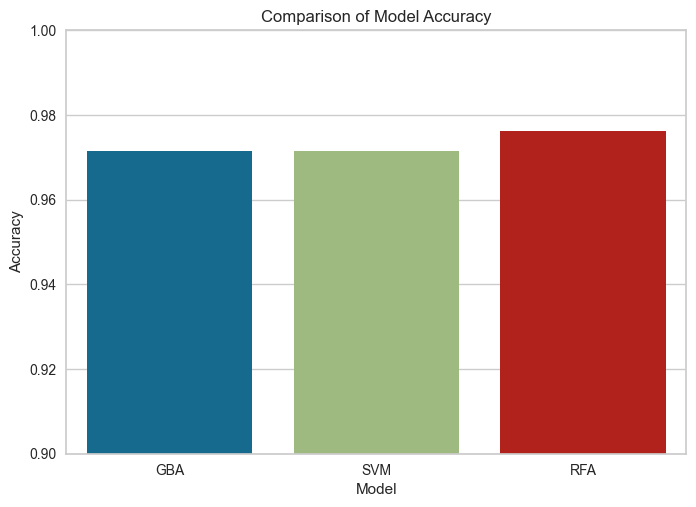

In [6]:

predicted_label1 = GBA.predict(X_test)
predicted_label2 = SVM.predict(X_test)
predicted_label3 = RFM.predict(X_test)

accuracy_model1 = accuracy_score(Y_test, predicted_label1)
accuracy_model2 = accuracy_score(Y_test, predicted_label2)
accuracy_model3 = accuracy_score(Y_test, predicted_label3)

sns.barplot(x=["GBA", "SVM", "RFA"], y=[accuracy_model1, accuracy_model2, accuracy_model3])

   
plt.title("Comparison of Model Accuracy")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(ymin = 0.9, ymax = 1)
plt.show()

d:\Python\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
d:\Python\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
d:\Python\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


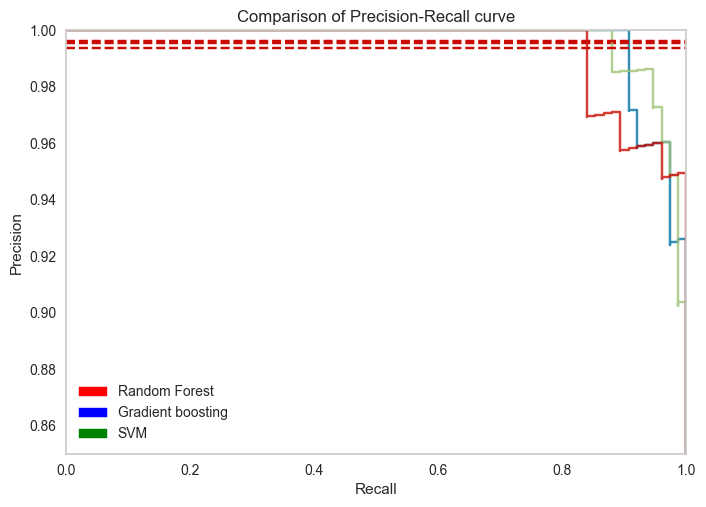

In [78]:
import matplotlib.patches as mpatches
fig, ax = plt.subplots()
viz = PrecisionRecallCurve(GBA, fill_area= False, title = "Comparison of Precision-Recall curve", ax= ax)
viz.fit(X_train, Y_train)
viz.score(X_test, Y_test)


viz2 = PrecisionRecallCurve(SVM, fill_area= False)
viz2.fit(X_train, Y_train)
viz2.score(X_test, Y_test)


viz3 = PrecisionRecallCurve(RFM, fill_area= False)
viz3.fit(X_train, Y_train)
viz3.score(X_test, Y_test)


viz.finalize()   
ax.set_ylim([0.85, 1.0])
red_patch = mpatches.Patch(color='red', label='Random Forest')
blue_patch = mpatches.Patch(color='blue', label='Gradient boosting')
yellow_patch = mpatches.Patch(color='green', label='SVM')
ax.legend(handles=[red_patch, blue_patch, yellow_patch])


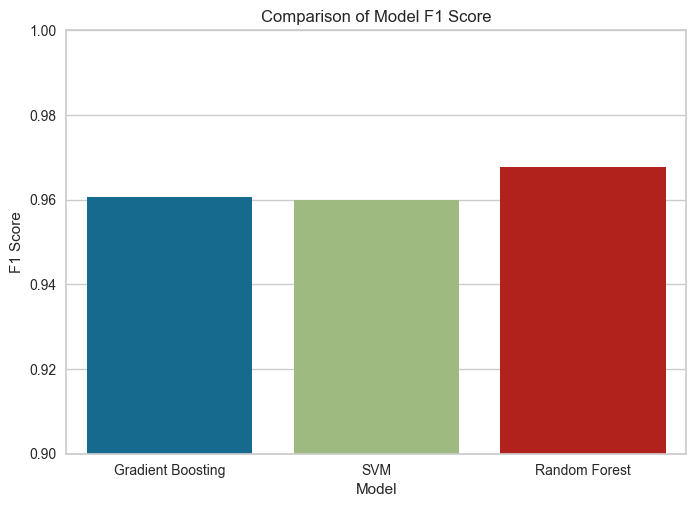

In [28]:
f1_GBA = f1_score(Y_test, predicted_label1)
f1_SVM = f1_score(Y_test, predicted_label2)
f1_RFM = f1_score(Y_test, predicted_label3)
f1_data = {'model': ['Gradient Boosting', 'SVM', 'Random Forest'], 'f1_score': [f1_GBA, f1_SVM, f1_RFM]}
sns.barplot(x=f1_data['model'], y=f1_data['f1_score']) 
plt.title("Comparison of Model F1 Score")
plt.xlabel("Model")
plt.ylabel("F1 Score")
plt.ylim(ymin = 0.9, ymax = 1)
plt.show()

d:\Python\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
d:\Python\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
d:\Python\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


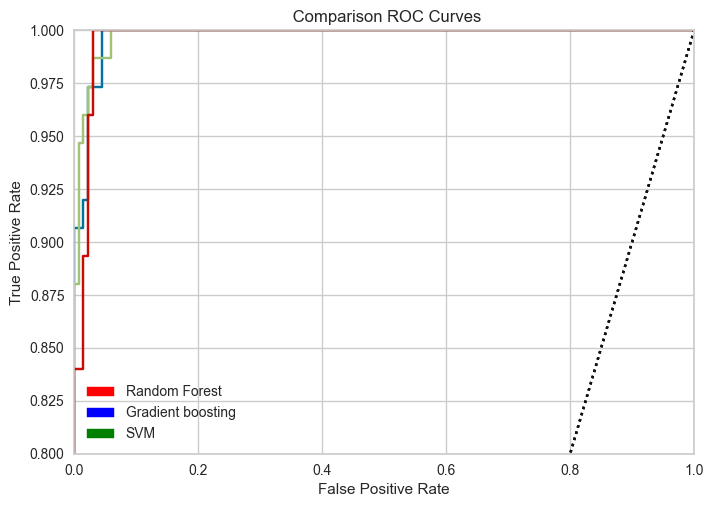

In [79]:
fig, ax = plt.subplots()
visualizer = ROCAUC(GBA, classes=["malignant", "benign"], binary = True, title= " Comparison ROC Curves", ax=ax)
visualizer.fit(X_train, Y_train)
visualizer.score(X_test, Y_test)


visualizer2 = ROCAUC(SVM, classes=["malignant", "benign"], binary = True)
visualizer2.fit(X_train, Y_train)
visualizer2.score(X_test, Y_test)


visualizer3 = ROCAUC(RFM, classes=["malignant", "benign"], binary = True)
visualizer3.fit(X_train, Y_train)
visualizer3.score(X_test, Y_test)

visualizer.finalize()   
ax.set_ylim([0.8, 1.0])
red_patch = mpatches.Patch(color='red', label='Random Forest')
blue_patch = mpatches.Patch(color='blue', label='Gradient boosting')
yellow_patch = mpatches.Patch(color='green', label='SVM')
ax.legend(handles=[red_patch, blue_patch, yellow_patch])


d:\Python\Lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


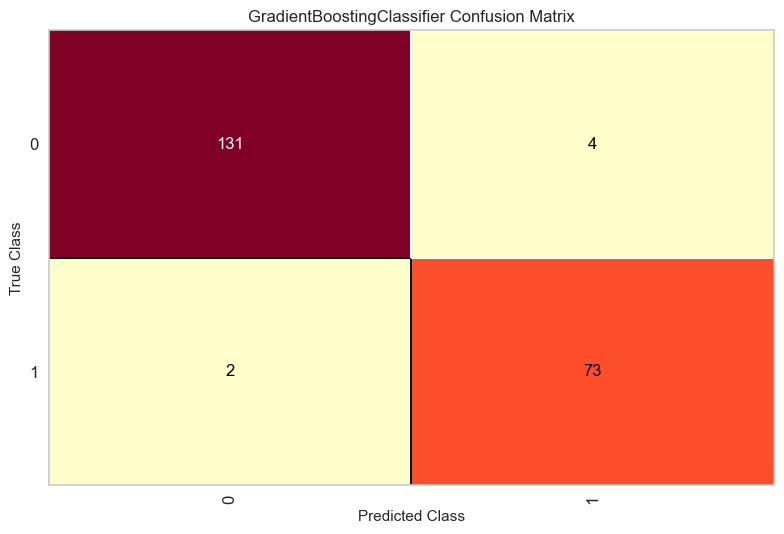

d:\Python\Lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


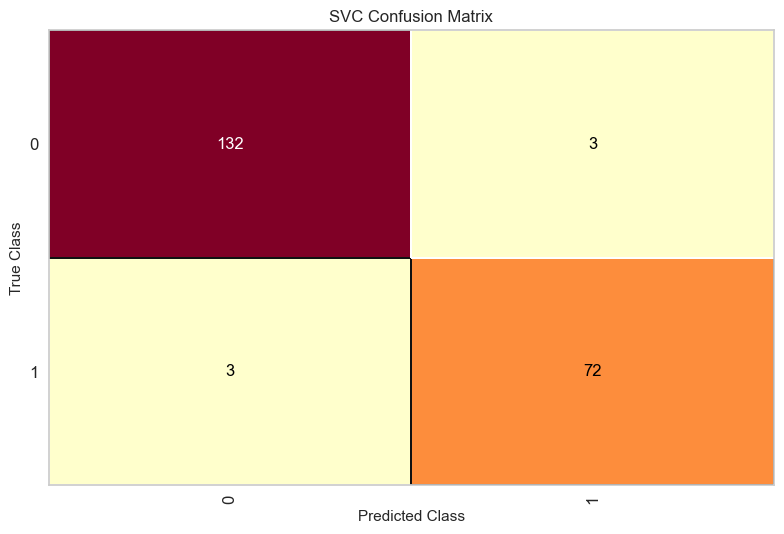

d:\Python\Lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


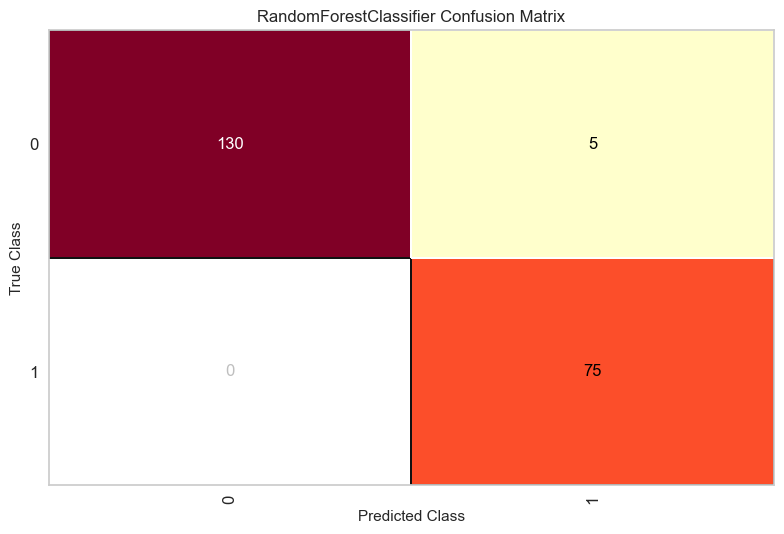

<AxesSubplot: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [10]:

ConfMat_GBA = ConfusionMatrix(GBA, classes=[0,1])
ConfMat_GBA.score(X_test, Y_test)
ConfMat_GBA.show()

ConfMat_SVM = ConfusionMatrix(SVM, classes=[0,1])
ConfMat_SVM.score(X_test, Y_test)
ConfMat_SVM.show()

ConfMat_RFM = ConfusionMatrix(RFM, classes=[0,1])
ConfMat_RFM.score(X_test, Y_test)
ConfMat_RFM.show()